In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold,train_test_split, cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import norm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
data = pd.read_csv('movie_reviews.csv')
unlabeled_data = pd.read_csv('test_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [3]:
data

,text,label
0,If you havent seen this movie than you need to...,1
1,but Cinderella gets my vote not only for the w...,0
2,This movie is pretty cheesy but I do give it c...,1
3,I have not seen a Van Damme flick for a while ...,1
4,This is a sleeper It defines Nicholas Cage The...,1
...,...,...
39995,This movie is inspiring to anyone who is or ha...,1
39996,This film hits the heart with a reality like n...,1
39997,East Side Story is a documentary of musical co...,1
39998,And a selfadmitted one to boot At one point th...,0


<Axes: >

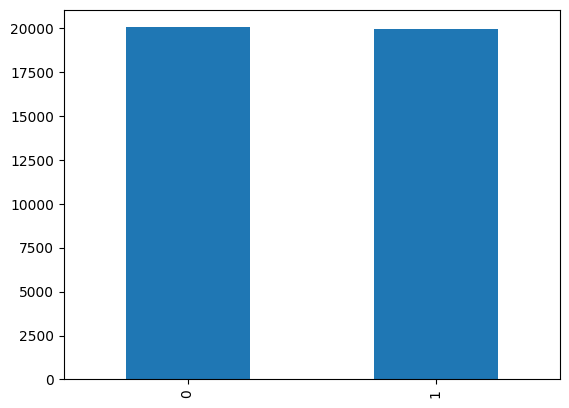

In [4]:
data['label'].value_counts().plot(kind = 'bar')

In [5]:
data['label'].loc[data['label']==1]

0        1
2        1
3        1
4        1
7        1
        ..
39992    1
39993    1
39995    1
39996    1
39997    1
Name: label, Length: 19951, dtype: int64

In [6]:
def preprocess_data(data, max_features=5000, random_state=42):
    """
    Tiền xử lý dữ liệu đánh giá phim cho mô hình máy học.

    Parameters:
    - data (DataFrame): Dữ liệu đánh giá phim, chứa các cột 'text' và 'label'.
    - max_features (int, optional): Số lượng từ vựng tối đa được giữ lại khi chuyển đổi văn bản.
      Mặc định là 5000.
    - random_state (int, optional): Seed để giữ nguyên sự ngẫu nhiên khi chia dữ liệu thành tập huấn luyện và tập kiểm thử.
      Mặc định là 42.

    Returns:
    - X_train (sparse matrix): Ma trận TF-IDF của văn bản trong tập huấn luyện.
    - y_train (Series): Nhãn của tập huấn luyện.
    - X_test (sparse matrix): Ma trận TF-IDF của văn bản trong tập kiểm thử.
    - y_test (Series): Nhãn của tập kiểm thử.
    """
    # Chia dữ liệu thành tập huấn luyện và tập kiểm thử
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=random_state)

    # Xử lý nhãn
    label_encoder = LabelEncoder()
    train_data['label'] = label_encoder.fit_transform(train_data['label'])
    test_data['label'] = label_encoder.transform(test_data['label'])

    # Xử lý văn bản
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english')
    X_train = tfidf_vectorizer.fit_transform(train_data['text'])
    X_test = tfidf_vectorizer.transform(test_data['text'])

    return X_train, train_data['label'], X_test, test_data['label']


In [7]:
def evaluate_accuracy(model, X, y, cv=5):
    """
    Đánh giá accuracy của mô hình sử dụng kỹ thuật cross-validation.

    Parameters:
    - model: Mô hình đã được huấn luyện.
    - X (sparse matrix): Ma trận đặc trưng.
    - y (array-like): Nhãn tương ứng.
    - cv (int, optional): Số lượng chia mảnh (folds) trong cross-validation. Mặc định là 5.

    Returns:
    - accuracy_scores (list): Danh sách các điểm accuracy cho mỗi mảnh trong cross-validation.
    """
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return accuracy_scores

In [8]:
# Tiền xử lý dữ liệu
X_train, y_train, _, _ = preprocess_data(data)

# Huấn luyện mô hình Logistic Regression
model_logistic = LogisticRegression(class_weight = 'balanced',max_iter = 1000)
model_logistic.fit(X_train, y_train)

# Đánh giá accuracy sử dụng cross-validation
accuracy_scores = evaluate_accuracy(model_logistic, X_train, y_train)

# In kết quả cross-validation
print(f'Accuracy Scores: {accuracy_scores}')
print(f'Mean Accuracy: {accuracy_scores.mean()}')

Accuracy Scores: [0.8896875  0.8825     0.8846875  0.88078125 0.881875  ]
Mean Accuracy: 0.8839062500000001
